# [Dataset: "Skyview an aerial landscape "](https://)

In [41]:
import kagglehub

# Download latest version
# Cambia tu ruta actual por esta que apunta directamente a las subcarpetas
path = '/root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1/Aerial_Landscapes'
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1/Aerial_Landscapes


Importe de librerias necesarias

In [42]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Definimos la ruta base, usando la variable 'path' que ya tienemos
# Parámetros del dataset
IMG_WIDTH = 256
IMG_HEIGHT = 256
BATCH_SIZE = 32
NUM_CLASSES = 15 # El dataset Skyview tiene 15 clases

Aumento de Datos

In [43]:
# CÓDIGO CLAVE PARA REVISAR Y EJECUTAR NUEVAMENTE

# --- Generadores de Datos ---

# 1. Configuramos los generadores con la división (split)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración con Aumento de Datos para evitar el 100% falso
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # Reserva 20% para pruebas reales
    rotation_range=20,
    horizontal_flip=True
)

# Entrenamiento: DEBE tener shuffle=True
train_generator = datagen.flow_from_directory(
    path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validación: Para la Matriz de Confusión, shuffle debe ser False
validation_generator = datagen.flow_from_directory(
    path,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 9600 images belonging to 15 classes.
Found 2400 images belonging to 15 classes.


Construccion modelo CNN

In [46]:
model = Sequential([
    # BLOQUE 1: Extracción de Características
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D((2, 2)),

    # BLOQUE 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # BLOQUE 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # BLOQUE 4
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # CLASIFICADOR (HEAD) - Aquí es donde procesamos los paisajes
    Flatten(),
    Dropout(0.5), # Vital para que la precisión no sea un 1.0 falso
    Dense(512, activation='relu'),

    # CAPA DE SALIDA - Las 15 categorías de Skyland
    Dense(15, activation='softmax')
])

Compilacion y entrenamiento

In [49]:
# Compilación: Optimizador Adam, función de pérdida para multiclase y métrica de precisión.
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy', # <--- CAMBIO CLAVE AQUÍ
    metrics=['accuracy']
)
# Muestra un resumen de la arquitectura
model.summary()

# Entrenamiento del Modelo
# Definimos los pasos por época para que cubra todas las imágenes en cada generador
STEPS_PER_EPOCH = train_generator.samples // BATCH_SIZE
VALIDATION_STEPS = validation_generator.samples // BATCH_SIZE

print("\n--- Iniciando Entrenamiento ---")
history = model.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=20, # Puedes empezar con 20 y luego ajustar
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,094,095 (49.95 MB)

 Trainable params: 13,094,095 (49.95 MB)

 Non-trainable params: 0 (0.00 B)


--- Iniciando Entrenamiento ---
Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 182s 593ms/step - accuracy: 0.2387 - loss: 2.2325 - val_accuracy: 0.5071 - val_loss: 1.4323
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 587ms/step - accuracy: 0.5558 - loss: 1.3335 - val_accuracy: 0.6158 - val_loss: 1.1291
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 202s 588ms/step - accuracy: 0.6356 - loss: 1.1096 - val_accuracy: 0.6517 - val_loss: 1.0556
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 175s 585ms/step - accuracy: 0.6758 - loss: 0.9833 - val_accuracy: 0.6517 - val_loss: 1.0076
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 176s 585ms/step - accuracy: 0.7013 - loss: 0.9024 - val_accuracy: 0.6700 - val_loss: 1.0057
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 177s 589ms/step - accuracy: 0.7140 - loss: 0.8449 - val_accuracy: 0.6917 - val_loss: 0.9010
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 180s 600ms/step - accuracy: 0.7308 - loss: 0.7986 - val_accuracy: 0.7088 - val_loss: 0.8430
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 176

In [51]:
import os

# Lista de contenido en base path
print(f"Contents of {path}:\n")
for item in os.listdir(path):
    item_path = os.path.join(path, item)
    print(f"- {item}{'/' if os.path.isdir(item_path) else ''}")


Contents of /root/.cache/kagglehub/datasets/ankit1743/skyview-an-aerial-landscape-dataset/versions/1/Aerial_Landscapes:

- Railway/
- Desert/
- Beach/
- Highway/
- Agriculture/
- River/
- Grassland/
- Lake/
- City/
- Mountain/
- Parking/
- Forest/
- Residential/
- Port/
- Airport/


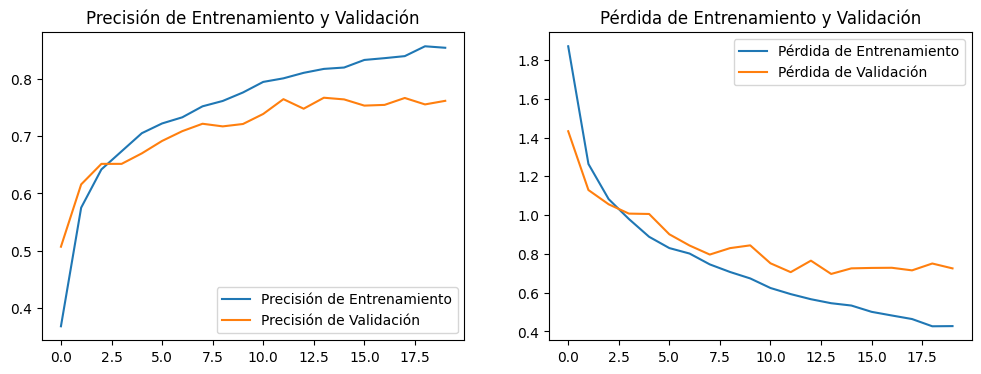

In [58]:
import matplotlib.pyplot as plt

# Obtener datos de la historia
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Gráfico 1: Precisión (Accuracy)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Precisión de Entrenamiento')
plt.plot(epochs_range, val_acc, label='Precisión de Validación')
plt.legend(loc='lower right')
plt.title('Precisión de Entrenamiento y Validación')

# Gráfico 2: Pérdida (Loss)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
plt.legend(loc='upper right')
plt.title('Pérdida de Entrenamiento y Validación')

plt.show()

In [59]:
from tensorflow.keras.optimizers import Adam

# Recompila el modelo con la función de pérdida para etiquetas One-Hot (categorical)
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy', # <--- ¡CAMBIAR AQUÍ!
    metrics=['accuracy']
)

print("Modelo recompilado con categorical_crossentropy.")

Modelo recompilado con categorical_crossentropy.


In [60]:
import numpy as np
from tensorflow.keras.preprocessing import image
from PIL import Image

def predict_from_array(img_array, model, index_to_class):
    """
    Realiza una predicción sobre un array de imagen preprocesado.
    Corrige el error de tipo de dato (np.int64 a int) en la clave.
    """
    # 1. Preparar entrada
    # Expande las dimensiones para crear un batch de tamaño 1
    img_input = np.expand_dims(img_array, axis=0)

    # 2. Hacer la predicción
    predictions = model.predict(img_input, verbose=0)

    # Obtener el índice de la clase con mayor probabilidad (resultado es np.int64)
    predicted_index_np = np.argmax(predictions[0])

    # --- ¡CORRECCIÓN CRÍTICA AQUÍ! ---
    # Convertir el índice de NumPy a un entero de Python para usarlo como clave
    predicted_index = int(predicted_index_np)
    # ----------------------------------

    # Obtener la probabilidad de esa clase
    confidence = predictions[0][predicted_index] * 100

    # 3. Decodificar (¡Ahora con la clave correcta!)
    predicted_class = index_to_class[predicted_index]

    return predicted_class, confidence, predicted_index

    Lista en español:
      -Río
      -Autopista
      -Desierto
      -Aparcamiento
      -Puerto
      -Lago
      -Bosque
      -Montaña
      -Pradera
      -Agricultura
      -Ferrocarril
      -Playa
      -Zona residencial
      -Aeropuerto
      -Ciudad

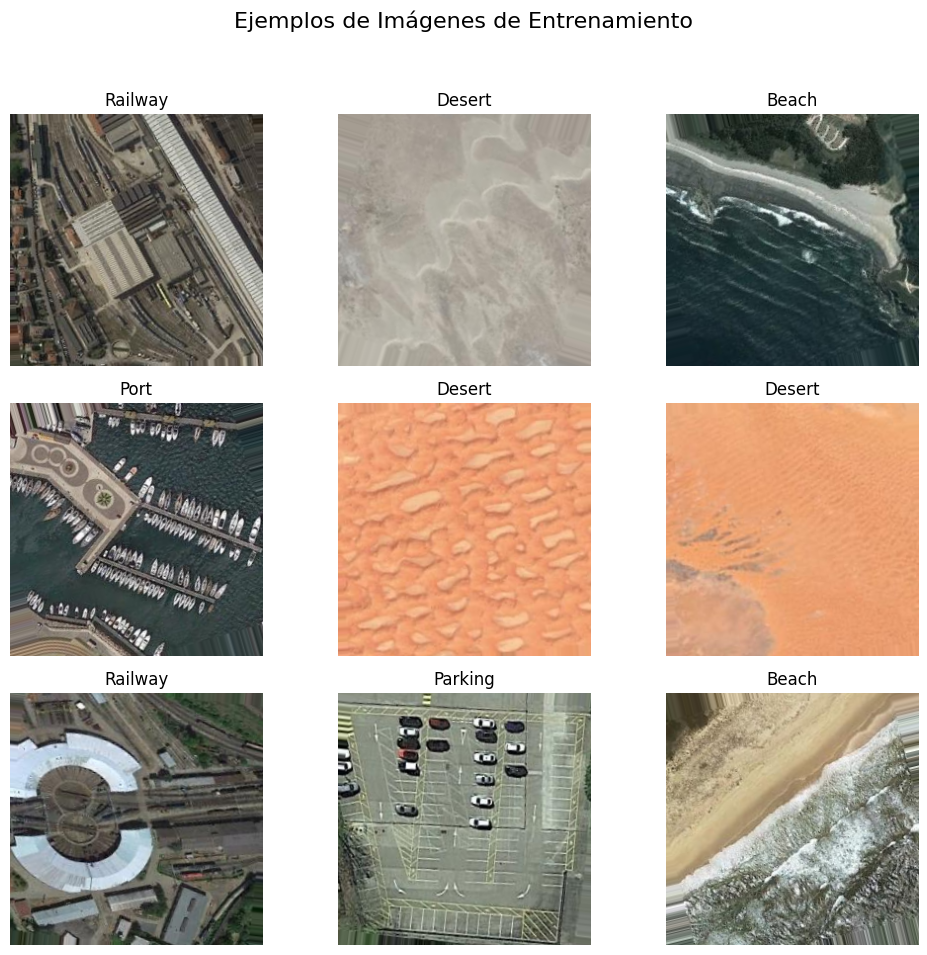

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Obtenemos un lote de imágenes y etiquetas del generador de entrenamiento
# Usamos next() para obtener el siguiente lote
images, labels = next(train_generator)

# Obtener los nombres de las clases para mostrar
class_names = list(train_generator.class_indices.keys())

# Mostramos las primeras 9 imágenes del lote
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i]) # Las imágenes ya están reescaladas a 0-1
    plt.title(class_names[np.argmax(labels[i])]) # Obtenemos el nombre de la clase a partir del one-hot encoding
    plt.axis('off')
plt.suptitle('Ejemplos de Imágenes de Entrenamiento', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 443ms/step


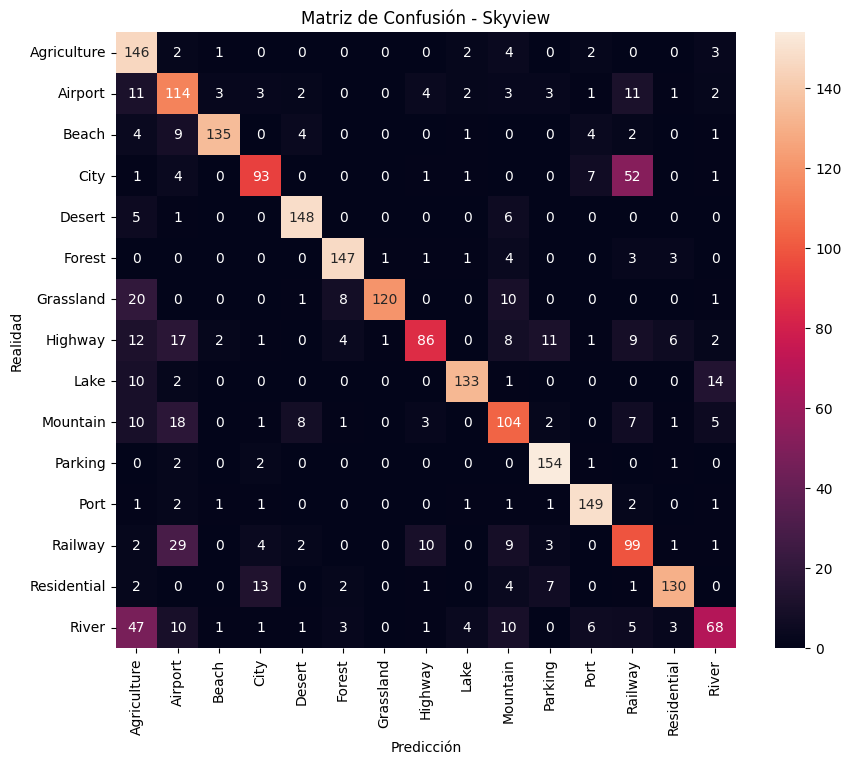

In [64]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Obtenemos las predicciones del conjunto de validación
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Generamos la matriz
cm = confusion_matrix(validation_generator.classes, y_pred)

# La graficamos
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión - Skyview')
plt.show()

In [40]:
import os

# 'path' es la ruta donde están tus carpetas de paisajes
for folder in sorted(os.listdir(path)):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):
        num_images = len(os.listdir(folder_path))
        print(f"Paisaje: {folder:15} | Cantidad de fotos: {num_images}")

Paisaje: Aerial_Landscapes | Cantidad de fotos: 15
